# Introduction

## The dataset used in this analysis focuses on understanding and predicting student performance based on various factors. It contains information about the number of hours students studied, their scores on previous year questions (PYQ), involvement in extracurricular activities, sleep hours, and the number of sample question papers solved. The target variable, Performance Index, represents the overall performance of students. By analyzing this dataset, we aim to uncover patterns and insights that contribute to student success and develop predictive models to estimate their performance based on the given factors.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset :

In [2]:
df = pd.read_csv("student.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Checking null values :

In [3]:
df.isnull().sum() # no any null values in the dataset

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## Checking duplicate values :

In [4]:
df.isnull().sum() # No duplicates in the dataset

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## Overview of the dataset :

In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Shape of the dataset :

In [6]:
df.shape # [Rows : 10000 , Columns : 6 ]

(10000, 6)

## Info of the dataset :

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## Split the input variables and target variable :

In [8]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["Performance Index"]),df["Performance Index"],test_size=0.3,random_state=3)

## Ploting pairplot to understand the input relations :

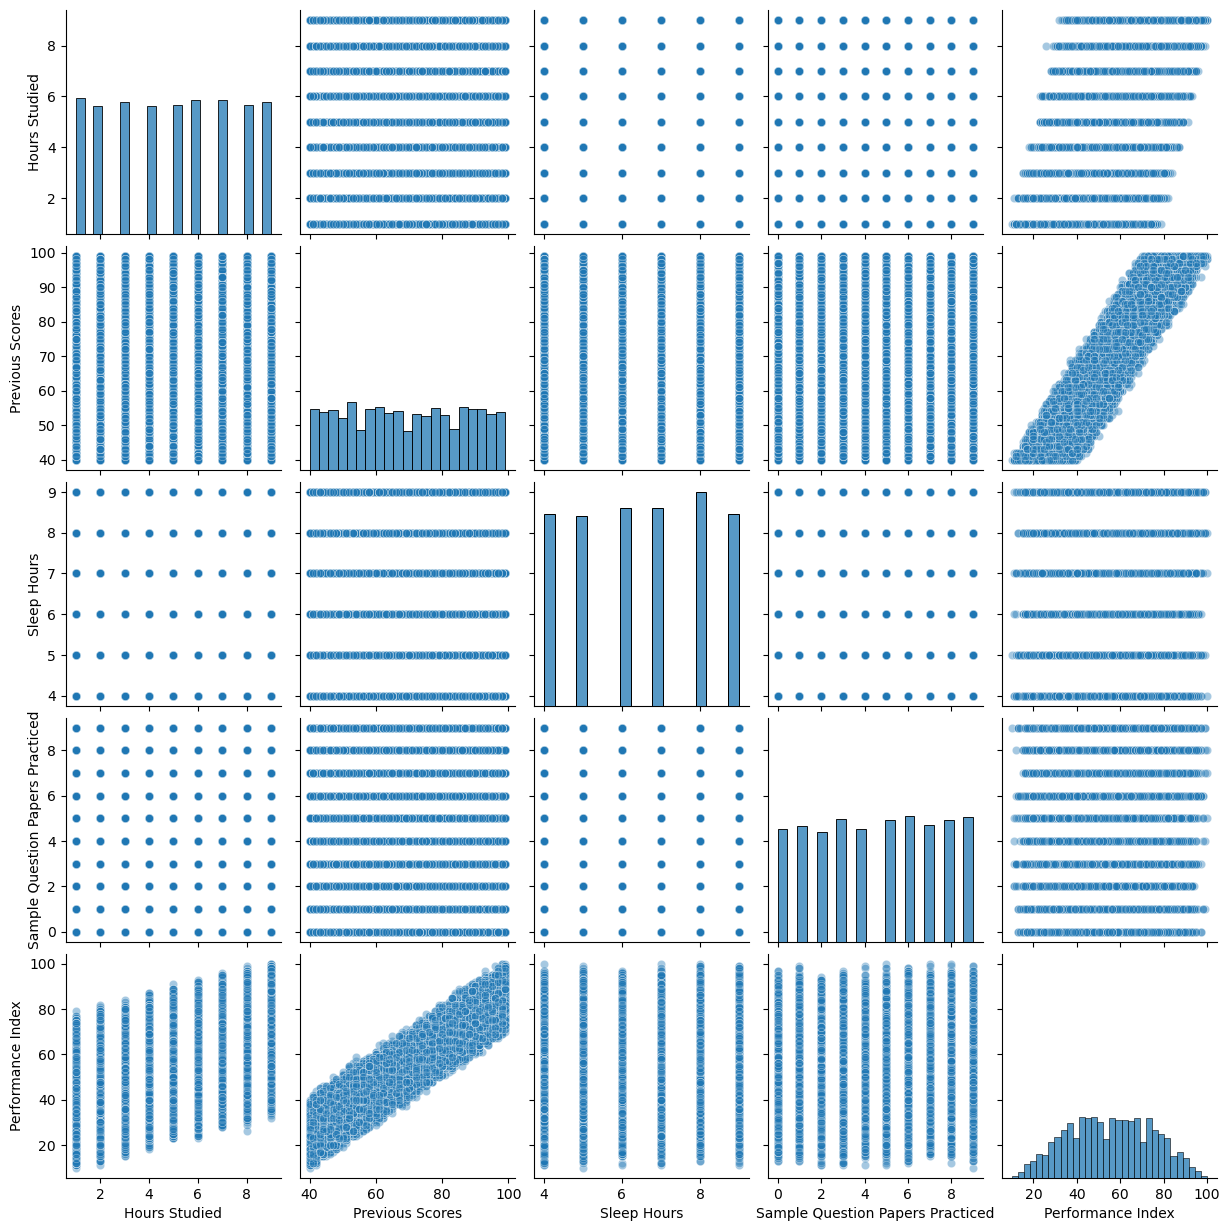

In [9]:
sns.pairplot(df,kind="scatter",plot_kws={"alpha" : 0.4})

In [13]:
df.drop(columns=["Extracurricular Activities"]).corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


## Checking the outliers using boxplot

In [14]:
new_df = df.drop(columns=["Extracurricular Activities","Performance Index"],axis=1)

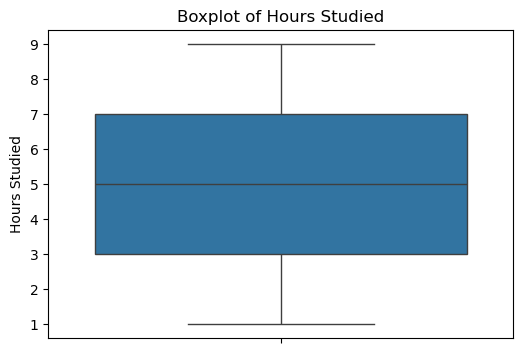

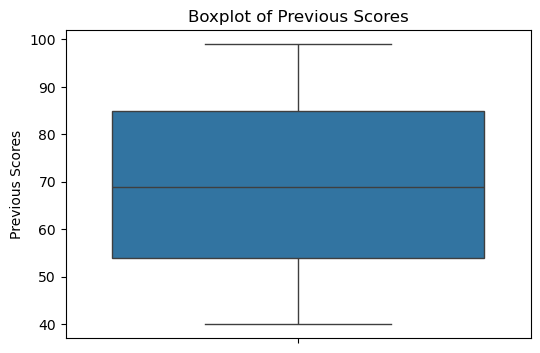

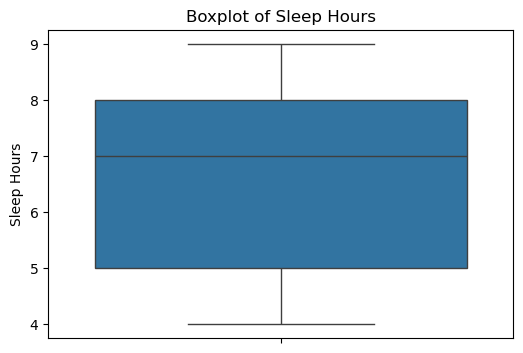

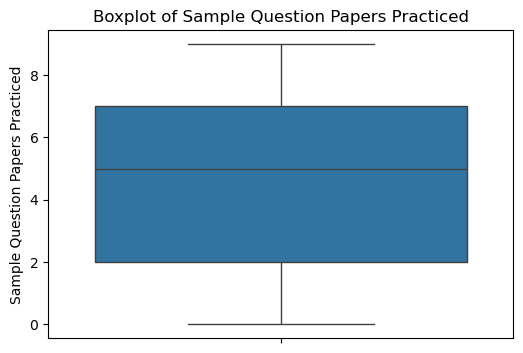

In [15]:
for column in new_df:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()  # their is no outliers in the input variables

## Onehotencoding on Extracurricular Activities

In [16]:
ohe = OneHotEncoder(sparse_output=False,drop="first",handle_unknown="ignore")

In [17]:
ohe.fit(x_train[["Extracurricular Activities"]])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [18]:
x_train_ohe = ohe.transform(x_train[["Extracurricular Activities"]])
x_test_ohe = ohe.transform(x_test[["Extracurricular Activities"]])

In [19]:
x_train_transformed=x_train.drop(columns=["Extracurricular Activities"])
x_test_transformed=x_test.drop(columns=["Extracurricular Activities"])

In [20]:
x_train_final = np.concatenate((x_train_transformed,x_train_ohe),axis=1)
x_test_final = np.concatenate((x_test_transformed,x_test_ohe),axis=1)

# Doing scaling using standardscaler :

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(x_train_final)

StandardScaler()

In [23]:
x_train_final_transformed = scaler.transform(x_train_final)
x_test_final_transformed = scaler.transform(x_test_final)

## Make a LinearRegression Model

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(x_train_final_transformed,y_train)

LinearRegression()

In [ ]:
## Feature importance

In [33]:
feature_names = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced","Extracurricular Activities"]
importance_df = pd.DataFrame({
    "feature_names": feature_names,
    "feature_importance": lr.coef_
})
importance_df = importance_df.sort_values(by="feature_importance", ascending=False)
print(importance_df)


                      feature_names  feature_importance
1                   Previous Scores           17.601151
0                     Hours Studied            7.401627
2                       Sleep Hours            0.810046
3  Sample Question Papers Practiced            0.558665
4        Extracurricular Activities            0.288858


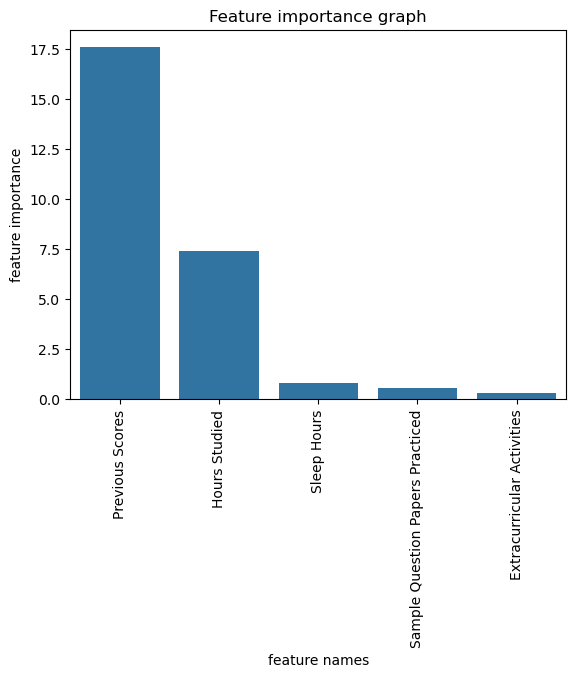

In [38]:
sns.barplot(x="feature_names",y="feature_importance",data=importance_df)
plt.title("Feature importance graph")
plt.xlabel("feature names")
plt.ylabel("feature importance")
plt.xticks(rotation=90)
plt.show()

## Predict the values 

In [34]:
y_pred = lr.predict(x_test_final_transformed)

## r2_score

In [35]:
print("r2_score :" , r2_score(y_test,y_pred)*100)  # r2_score is 98 percent 

r2_score : 98.8713122204429


## mean_squared_error

In [73]:
print("mean_squared_error :" ,mean_squared_error(y_test,y_pred))

mean_squared_error : 4.225474308250277


## mean_absolute_error

In [74]:
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

mean_absolute_error: 1.6339029070584832


# Thank You!